## Introduction

This is a jupyter notebook that accompanies the conference proceedings:

Stochastic Structural Modeling of a Geothermal Field: Patua Geothermal Field Case Study

The code in this notebook uses the package PyNoddy, see https://github.com/flohorovicic/pynoddy

If there are any issues with this notebook, please let me know: ahinoamp@stanford.edu

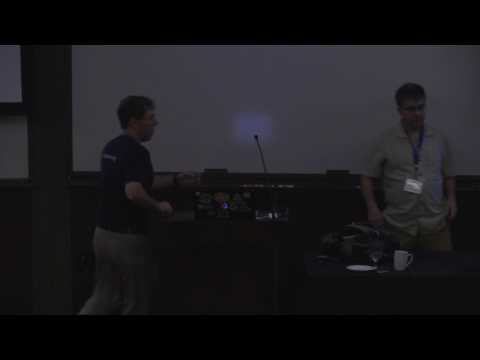

In [1]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('eWzY2nGfkXk'))

## Imports 

In [2]:
###############
# some imports
###############
import ezdxf, itertools, k3d, matplotlib, meshio, pynoddy, sys, os, subprocess, time, vtk
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.image as mpimg
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import scipy.interpolate as interp
from shutil import copyfile
from vtkplotter import *
import PriorModelPlottingUtilty as util
util.importModulesAndSetup()
import pynoddy.history
import pynoddy.experiment
import pynoddy.events
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Javascript

## View 3D models from Stanford Geothermal Workshop

In [3]:
plot_scenario = widgets.Dropdown(options = ['Choose a Scenario', 'Scenario1_MedResolution', 'Scenario2_MedResolution', 'Scenario3_MedResolution', 'Scenario1_HighResolution', 'Scenario2_HighResolution', 'Scenario3_HighResolution'])
def plot_scenario_eventhandler(change):
    if ((change.new != change.old)& (change.new !='Choose a Scenario')):
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))
plot_scenario.observe(plot_scenario_eventhandler, names='value')
display(plot_scenario)

Dropdown(options=('Choose a Scenario', 'Scenario1_MedResolution', 'Scenario2_MedResolution', 'Scenario3_MedRes…

In [ ]:
plot = Plotter(axes=1, bg='white', interactive=1)
settings.embedWindow('itkwidgets') #you can also choose to change to itkwidgets, k3d, False (popup)
util.PlotScenarios(plot_scenario.value, plot, plotwells =0)
plot.show(viewup='z')

## Generate Realizations

In [ ]:
scenario2plot = widgets.Dropdown(options = ['Choose a Scenario', 'Scenario_1', 'Scenario_2', 'Scenario_3'])
gridSize2Choose = widgets.Dropdown(options = ['Choose a Block Size', '50(m) - HighRes', '100(m) - MedRes', '150(m) - LowRes'])
display(scenario2plot)
display(gridSize2Choose)
btn = widgets.Button(description='Run')
def btn_eventhandler(obj):
    Run=1
    if(scenario2plot.value=='Choose a Scenario'):
        print('Please choose a scenario')
        Run=0
    if(gridSize2Choose.value=='Choose a Block Size'):
        print('Please choose a block size')
        Run = 0
    if(Run):
        print('Running')
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+3)'))
btn.on_click(btn_eventhandler)
display(btn)

In [57]:
print('This is the structural uncertainty table for ' + scenario2plot.value)
TableFile ='Data/PriorUncertaintyTables/PriorUncertaintyTable_'+ scenario2plot.value+'.csv'
PriorStructuralModelTable = pd.read_csv(TableFile)
PriorStructuralModelTable.head(50)

This is the structural uncertainty table for Scenario_3


,Property,Parameter,Event Number,Event Name,Parameter Value
0,Density,Prior distribution type,1,Sed,Gaussian
1,Density,Prior distribution paramter 1,1,Sed,2.328
2,Density,Prior distribution paramter 2,1,Sed,0.189
3,Density,Prior distribution type,1,Felsic,Gaussian
4,Density,Prior distribution paramter 1,1,Felsic,2.386
5,Density,Prior distribution paramter 2,1,Felsic,0.149
6,Density,Prior distribution type,1,Mafic,Gaussian
7,Density,Prior distribution paramter 1,1,Mafic,2.531
8,Density,Prior distribution paramter 2,1,Mafic,0.106
9,Density,Prior distribution type,1,Intrusive,Gaussian


Finished calculating model
The number of triangle elements (cells/faces) is: 106735
Finished calculating model
The number of triangle elements (cells/faces) is: 107634
Finished calculating model
The number of triangle elements (cells/faces) is: 108601
Finished calculating model
The number of triangle elements (cells/faces) is: 106739
0
hi
Finished calculating model
1
hi
Finished calculating model
2
hi
Finished calculating model
3
hi
Finished calculating model


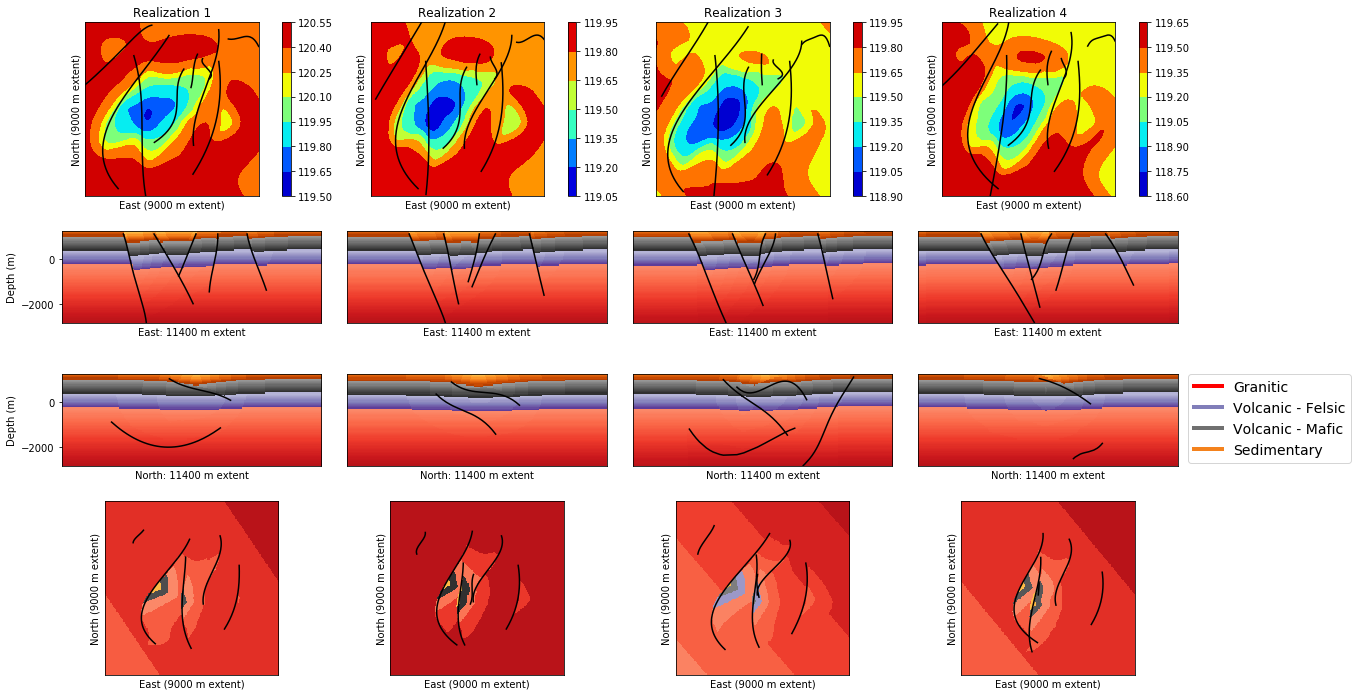

In [61]:
util.GenerateRealizations(RealizationName=scenario2plot.value, nrealizations=4, cubesizetxt = gridSize2Choose.value, outputoption = 'ALL', foldersuffix = '')
util.plotRealizations(RealizationName=scenario2plot.value, foldersuffix = '')